In [48]:
import numpy as np
import cv2
import glob
import matplotlib.pylab as plt
import pandas as pd
import fracture
import sys

#csv파일 형식 바꾸기!

"""setting values"""
path = 'G:/experiment data/aluminum/2020-09-13/2'  #이미지 불러올 경로
path_save= 'G:/experiment data/aluminum/2020-09-13'  #데이터 저장할 경로


img_files = glob.glob(path+'//*.jpg')
if not img_files:
    print("이미지 폴더 경로지정 잘못됨.")
    sys.exit()

print("파일 갯수 :", len(img_files))
src = cv2.imread(img_files[0],cv2.IMREAD_GRAYSCALE)

x,y,w,h = cv2.selectROI(src)
crop = src[y:y+h, x:x+w]
cv2.imshow('crop',crop)
while True:
    if cv2.waitKey() == 27:
        cv2.destroyAllWindows()
        sys.exit()
        break
    elif cv2.waitKey():
        break
cv2.destroyAllWindows()

ml = []
idx = 0

for file in img_files:
    src2 = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    dst = cv2.absdiff(src[y:y+h, x:x+w], src2[y:y+h, x:x+w])
    dst_average = np.average(dst)/255
    ml = np.append(ml, dst_average)
    idx += 1
    print(idx, '완료!')

파일 갯수 : 7519
1 완료!
2 완료!
3 완료!
4 완료!
5 완료!
6 완료!
7 완료!
8 완료!
9 완료!
10 완료!
11 완료!
12 완료!
13 완료!
14 완료!
15 완료!
16 완료!
17 완료!
18 완료!
19 완료!
20 완료!
21 완료!
22 완료!
23 완료!
24 완료!
25 완료!
26 완료!
27 완료!
28 완료!
29 완료!
30 완료!
31 완료!
32 완료!
33 완료!
34 완료!
35 완료!
36 완료!
37 완료!
38 완료!
39 완료!
40 완료!
41 완료!
42 완료!
43 완료!
44 완료!
45 완료!
46 완료!
47 완료!
48 완료!
49 완료!
50 완료!
51 완료!
52 완료!
53 완료!
54 완료!
55 완료!
56 완료!
57 완료!
58 완료!
59 완료!
60 완료!
61 완료!
62 완료!
63 완료!
64 완료!
65 완료!
66 완료!
67 완료!
68 완료!
69 완료!
70 완료!
71 완료!
72 완료!
73 완료!
74 완료!
75 완료!
76 완료!
77 완료!
78 완료!
79 완료!
80 완료!
81 완료!
82 완료!
83 완료!
84 완료!
85 완료!
86 완료!
87 완료!
88 완료!
89 완료!
90 완료!
91 완료!
92 완료!
93 완료!
94 완료!
95 완료!
96 완료!
97 완료!
98 완료!
99 완료!
100 완료!
101 완료!
102 완료!
103 완료!
104 완료!
105 완료!
106 완료!
107 완료!
108 완료!
109 완료!
110 완료!
111 완료!
112 완료!
113 완료!
114 완료!
115 완료!
116 완료!
117 완료!
118 완료!
119 완료!
120 완료!
121 완료!
122 완료!
123 완료!
124 완료!
125 완료!
126 완료!
127 완료!
128 완료!
129 완료!
130 완료!
131 완료!
132 완료!
133 완료!
134 완료!
135 완료!
136 완료!
137 완료!

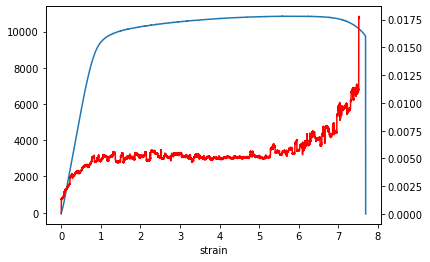

In [104]:
import matplotlib.pyplot as plt
import pandas as pd

df= pd.read_csv('G:\experiment data/aluminum/2020-09-13/20200912.is_tens_RawData/Specimen_RawData_2.csv',
                encoding='CP949')
data = np.array(df).astype(float)
fig, ax = plt.subplots()
ax1 = ax.twinx()
ax.plot(data[:,1],data[:,2])
ax1.plot(data[:7519,1]*10,ml, c='red')
ax.set_xlabel('strain')

plt.savefig('./graph.jpg', dpi =300)